In [1]:
# importing important libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  , OrdinalEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
# importing the data set
train_data=pd.read_csv('adult_data.csv')

In [8]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
train_data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [10]:
train_data.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 salary                2
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
train_data.shape

(32561, 15)

In [19]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [20]:
train_data.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [21]:
print(train_data)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [22]:
handle_capital_gain(train_data)

In [23]:
print(train_data)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

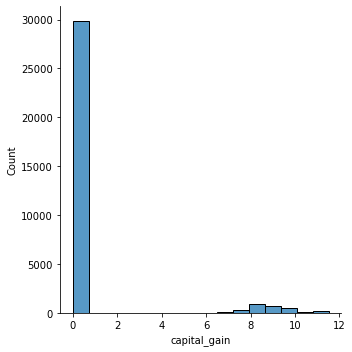

In [24]:
sns.displot(train_data['capital_gain'])
plt.show()

# REMOVING OUTLIERS FROM HOURS PER WEEK


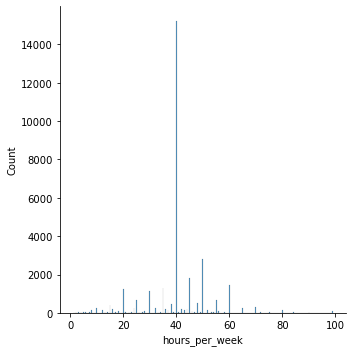

In [26]:
sns.displot(train_data['hours_per_week'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


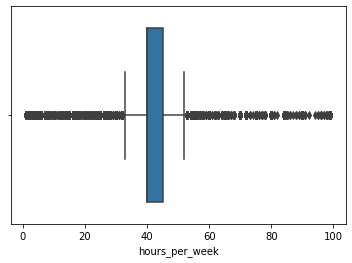

In [27]:
sns.boxplot(train_data['hours_per_week'])
plt.show()

In [37]:
def remove_outlier_from_hours_per_week(train_data):
    IQR =train_data['hours_per_week'].quantile(.75)-train_data['hours_per_week'].quantile(.25)
    
    lower_range=train_data['hours_per_week'].quantile(.25)-(1.5 * IQR)
    upper_range=train_data['hours_per_week'].quantile(.75)+(1.5 * IQR)
    
    train_data.loc[train_data['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    train_data.loc[train_data['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [38]:
remove_outlier_from_hours_per_week(train_data)

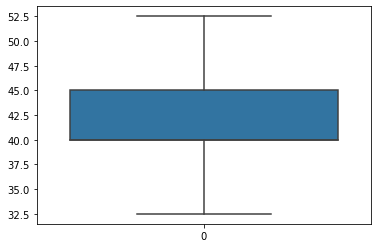

In [39]:
sns.boxplot(data=train_data['hours_per_week'])
plt.show()

# REMOVE OUTLIERS FROM EDUCATION NUM


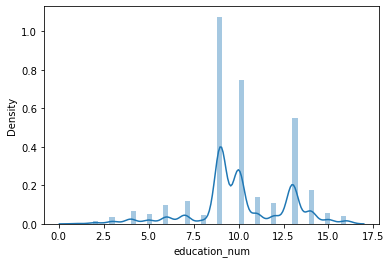

In [46]:
sns.distplot(train_data['education_num'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


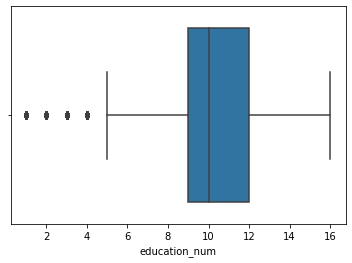

In [47]:
sns.boxplot(train_data['education_num'])
plt.show()

In [49]:
def remove_outlier_education_num(train_data):
    IQR = train_data['education_num'].quantile(0.75) - train_data['education_num'].quantile(0.25)
    
    lower_range = train_data['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = train_data['education_num'].quantile(0.75) + (1.5 * IQR)
    
    train_data.loc[train_data['education_num'] <= lower_range, 'education_num'] = lower_range
    train_data.loc[train_data['education_num'] >= upper_range, 'education_num'] = upper_range

In [50]:
remove_outlier_education_num(train_data)

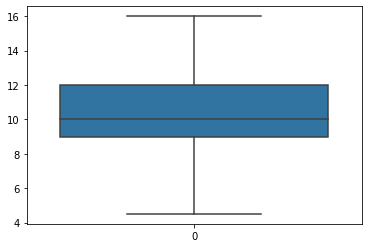

In [51]:
sns.boxplot(data=train_data['education_num'])
plt.show()

# REMOVE OUTLIERS FROM CAPITAL LOSS

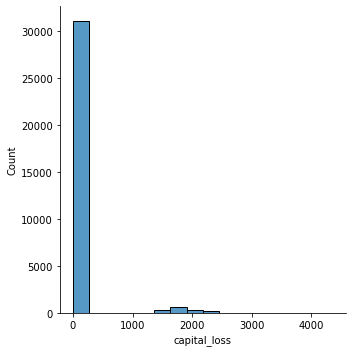

In [53]:
sns.displot(train_data['capital_loss'])
plt.show()

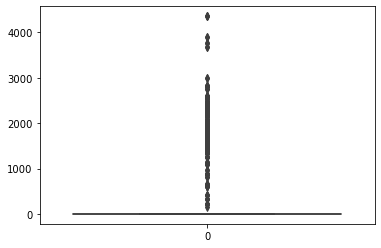

In [54]:
sns.boxplot(data=train_data['capital_loss'])
plt.show()

In [57]:
def capital_loss_log(train_data):
    train_data['capital_loss'] = np.where(train_data['capital_loss'] == 0, np.nan, train_data['capital_loss'])
    train_data['capital_loss'] = np.log(train_data['capital_loss'])
    train_data['capital_loss'] = train_data['capital_loss'].replace(np.nan, 0)

In [58]:
capital_loss_log(train_data)

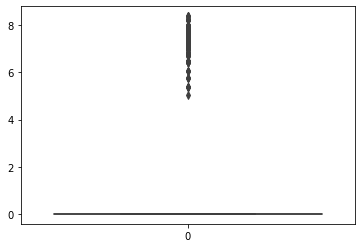

In [59]:
sns.boxplot(data=train_data['capital_loss'])
plt.show()

In [60]:
def remove_outliers_from_capital_loss(train_data):
    IQR = train_data['capital_loss'].quantile(.75)-train_data['capital_loss'].quantile(.25)
    
    lower_range=train_data['capital_loss'].quantile(.25)-(1.5 * IQR)
    upper_range=train_data['capital_loss'].quantile(.75)+(1.5 * IQR)
    
    train_data.loc[train_data['capital_loss']<=lower_range,'capital_loss']=lower_range
    train_data.loc[train_data['capital_loss']>=upper_range,'capital_loss']=upper_range

In [61]:
remove_outliers_from_capital_loss(train_data)

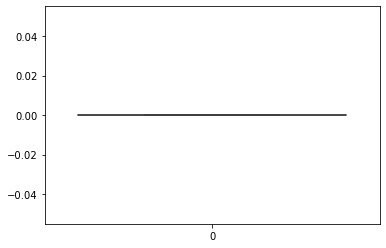

In [62]:
sns.boxplot(data=train_data['capital_loss'])
plt.show()

# TRAIN TEST SPLIT

In [64]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 14)
(6513, 14)
(26048,)
(6513,)


In [66]:
# splitting the data into categorical and numerical data 
X_train_cat=X_train.select_dtypes(include='object')
X_train_num=X_train.select_dtypes(include=['int32','int64','float32','float64'])
X_test_cat=X_test.select_dtypes(include='object')
X_test_num=X_test.select_dtypes(include=['int32','int64','float32','float64'])


In [67]:
print(X_train_cat)
print(X_test_cat)
print(X_train_num)
print(X_test_num)

               workclass      education       marital_status  \
5514           Local-gov      Bachelors        Never-married   
19777            Private      Assoc-voc   Married-civ-spouse   
10781   Self-emp-not-inc            9th            Separated   
32240            Private      Assoc-voc   Married-civ-spouse   
9876             Private   Some-college             Divorced   
...                  ...            ...                  ...   
29802            Private      Bachelors   Married-civ-spouse   
5390             Private           12th             Divorced   
860              Private           11th        Never-married   
15795   Self-emp-not-inc        HS-grad   Married-civ-spouse   
23654       Self-emp-inc      Bachelors             Divorced   

             occupation    relationship    race      sex  native_country  
5514     Prof-specialty   Not-in-family   White   Female   United-States  
19777   Exec-managerial         Husband   White     Male   United-States  
10781 

In [69]:
# preprocessing or encoding for categorical and numerical data
print(X_train.isnull().sum())
print(X_train_cat.isnull().sum())
print(X_train_num.isnull().sum())
print(X_test_cat.isnull().sum())
print(X_test_num.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64
age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64
age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


# ORDINAL ENCODER

In [70]:
# preprocesing ordinal encoder for categorical train and test data

OE=OrdinalEncoder()
OE.fit(X_train_cat)
X_train_cat_enc=OE.transform(X_train_cat)

OE.fit(X_test_cat)
X_test_cat_enc=OE.transform(X_test_cat)


In [71]:
print(X_train_cat_enc)
print(X_test_cat_enc)

[[ 2.  9.  4. ...  4.  0. 39.]
 [ 4.  8.  2. ...  4.  1. 39.]
 [ 6.  6.  5. ...  4.  1. 39.]
 ...
 [ 4.  1.  4. ...  4.  0. 39.]
 [ 6. 11.  2. ...  4.  1. 39.]
 [ 5.  9.  0. ...  4.  1. 39.]]
[[ 3. 15.  0. ...  4.  0. 37.]
 [ 6. 11.  2. ...  4.  0. 37.]
 [ 3.  9.  2. ...  2.  1. 37.]
 ...
 [ 3. 14.  2. ...  4.  1. 37.]
 [ 3.  9.  4. ...  4.  0. 37.]
 [ 3. 11.  4. ...  4.  1. 37.]]


# STANDARD SCALER

In [73]:
# preprocessing on numerical test data

SS=StandardScaler()
SS.fit(X_train_num)
X_train_num_enc=SS.transform(X_train_num)

SS.fit(X_test_num)
X_test_num_enc=SS.transform(X_test_num)

In [74]:
print(X_train_num_enc)
print(X_test_num_enc)

[[-0.40875606  0.08005085  1.16894717 -0.29703885  0.          1.43051047]
 [-0.1888573  -0.98165286  0.35569051 -0.29703885  0.          1.43051047]
 [ 1.42373357  0.126197   -2.08407946 -0.29703885  0.         -0.1890949 ]
 ...
 [-1.50824984  0.25206312 -1.2708228  -0.29703885  0.         -1.40379892]
 [ 0.83733689 -1.28762772 -0.45756615 -0.29703885  0.          1.83541181]
 [-0.33545648 -0.59020877  1.16894717 -0.29703885  0.          1.83541181]]
[[-0.85119097 -0.27785295 -0.04896209 -0.30808483  0.         -0.53602324]
 [ 0.4693744  -1.30409    -0.4551915  -0.30808483  0.         -0.21525149]
 [-0.70446149 -0.03695487  1.16972614 -0.30808483  0.          1.78957196]
 ...
 [ 0.61610389  1.53819835  1.98218496  4.27583217  0.          1.06783552]
 [-0.85119097 -1.36883194  1.16972614 -0.30808483  0.         -0.21525149]
 [-1.51147366 -1.53562554 -0.4551915  -0.30808483  0.         -1.41814556]]


# LABEL ENCODER

In [75]:
LE=LabelEncoder()
LE.fit(y_train)
y_train_enc=LE.transform(y_train)

LE.fit(y_test)
y_test_enc=LE.transform(y_test)


# CONCAT TRAIN AND TEST NUMERICAL AND CATEGORICAL DATA 

In [77]:
X_train_cat_enc_df=pd.DataFrame(X_train_cat_enc)
X_train_num_enc_df=pd.DataFrame(X_train_num_enc)
X_train_final=pd.concat([X_train_cat_enc_df,X_train_num_enc_df],axis=1)

In [78]:
X_test_cat_enc_df=pd.DataFrame(X_test_cat_enc)
X_test_num_enc_df=pd.DataFrame(X_test_num_enc)
X_test_final=pd.concat([X_test_cat_enc_df,X_test_num_enc_df],axis=1)

# MODEL BUILDING AND PREDICTION

In [82]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train_final,y_train_enc)
y_pred=model.predict(X_test_final)
from sklearn.metrics import classification_report , accuracy_score , recall_score, f1_score , precision_score , confusion_matrix

In [83]:
print(y_pred)

[0 0 0 ... 1 0 0]


# MODEL EVALUATION

In [84]:
ACCURACY=accuracy_score(y_pred,y_test_enc)
print(ACCURACY)

0.8226623675725472


In [85]:
RECALL=recall_score(y_pred,y_test_enc)
print(RECALL)

0.7015503875968992


In [86]:
F1SCORE=f1_score(y_pred,y_test_enc)
print(F1SCORE)

0.5562812139838649


In [87]:
PRECISION=precision_score(y_pred,y_test_enc)
print(PRECISION)

0.46085295989815406


In [88]:
CLASSIFICATION=classification_report(y_pred,y_test_enc)
print(CLASSIFICATION)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5481
           1       0.46      0.70      0.56      1032

    accuracy                           0.82      6513
   macro avg       0.70      0.77      0.72      6513
weighted avg       0.86      0.82      0.84      6513



In [89]:
CONFUSION=confusion_matrix(y_pred,y_test_enc)
print(CONFUSION)

[[4634  847]
 [ 308  724]]
